In [1]:
import pandas as pd
import requests
import json
import numpy as np
from datetime import datetime, date

In [27]:
url = 'https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=667037dc-27d7-4731-9180-7882b857928f&limit=2000'

In [28]:
response = requests.get(url)

In [29]:
response

<Response [200]>

In [30]:
print(response.text)

{"success":true,"result":{"resource_id":["667037dc-27d7-4731-9180-7882b857928f"],"limit":2000,"total":"196","records":[{"end_of_month":"2004-03","preliminary":"0","assets_total":"741258.0","assets_foreign_notes_coins":"81.8","assets_adfb":"517252.8","assets_lnbc":"79365.8","assets_bills":"10319.1","assets_sae":"103123.8","assets_other_foreign":"31114.7","liab_total":"704428.7","liab_dnbc":"158750.6","liab_adtb":"513997.6","liab_bills":"22.4","liab_other_foreign":"31658.1","net_foreign_assets_liab":"36829.3","timestamp":"1596659167"},{"end_of_month":"2004-04","preliminary":"0","assets_total":"744603.6","assets_foreign_notes_coins":"75.1","assets_adfb":"523937.8","assets_lnbc":"80518.5","assets_bills":"10970.4","assets_sae":"103468.6","assets_other_foreign":"25633.2","liab_total":"702338.9","liab_dnbc":"160910.4","liab_adtb":"514614.0","liab_bills":"27.6","liab_other_foreign":"26786.9","net_foreign_assets_liab":"42264.7","timestamp":"1596659167"},{"end_of_month":"2004-05","preliminary":"

In [31]:
response.headers

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Content-Type': 'application/json; charset=utf-8', 'Expires': '-1', 'X-AspNet-Version': '4.0.30319', 'X-Powered-By': 'Generic', 'Access-Control-Allow-Origin': '*', 'Content-Length': '83291', 'Date': 'Wed, 05 Aug 2020 12:26:07 GMT', 'Connection': 'keep-alive', 'Set-Cookie': 'MAScookie=!VDQxAWmub41R0eismaGRUExspuQYhTQ3jH6bZjDDSKC/AbJzndswdg/Z47XIC9oftbKDpOg8k9cvvuQJDQFi07OxldGu4G5UIEYHKXbRWgi81Nqflti/+U0l3Y997+RfBttRH+XgP3TTpSWzauThNCLWKAbaenM=;HttpOnly;Secure;Path=/;Version=1;, TS011284b5=01df21a10ab2d754de81a9fdfba6e0e7e9d6b63129d821bd456a98a6ba8027bc5106d3f7b49f7298679bb93e392e0ebdff42d97ace; Path=/; Secure; HTTPOnly', 'Strict-Transport-Security': 'max-age=31536000 ; includeSubDomains ; preload'}

In [32]:
res_json = response.json()

In [33]:
res_json

{'success': True,
 'result': {'resource_id': ['667037dc-27d7-4731-9180-7882b857928f'],
  'limit': 2000,
  'total': '196',
  'records': [{'end_of_month': '2004-03',
    'preliminary': '0',
    'assets_total': '741258.0',
    'assets_foreign_notes_coins': '81.8',
    'assets_adfb': '517252.8',
    'assets_lnbc': '79365.8',
    'assets_bills': '10319.1',
    'assets_sae': '103123.8',
    'assets_other_foreign': '31114.7',
    'liab_total': '704428.7',
    'liab_dnbc': '158750.6',
    'liab_adtb': '513997.6',
    'liab_bills': '22.4',
    'liab_other_foreign': '31658.1',
    'net_foreign_assets_liab': '36829.3',
    'timestamp': '1596659167'},
   {'end_of_month': '2004-04',
    'preliminary': '0',
    'assets_total': '744603.6',
    'assets_foreign_notes_coins': '75.1',
    'assets_adfb': '523937.8',
    'assets_lnbc': '80518.5',
    'assets_bills': '10970.4',
    'assets_sae': '103468.6',
    'assets_other_foreign': '25633.2',
    'liab_total': '702338.9',
    'liab_dnbc': '160910.4',
   

In [34]:
res_json.keys()

dict_keys(['success', 'result'])

In [35]:
res_json.values()

dict_values([True, {'resource_id': ['667037dc-27d7-4731-9180-7882b857928f'], 'limit': 2000, 'total': '196', 'records': [{'end_of_month': '2004-03', 'preliminary': '0', 'assets_total': '741258.0', 'assets_foreign_notes_coins': '81.8', 'assets_adfb': '517252.8', 'assets_lnbc': '79365.8', 'assets_bills': '10319.1', 'assets_sae': '103123.8', 'assets_other_foreign': '31114.7', 'liab_total': '704428.7', 'liab_dnbc': '158750.6', 'liab_adtb': '513997.6', 'liab_bills': '22.4', 'liab_other_foreign': '31658.1', 'net_foreign_assets_liab': '36829.3', 'timestamp': '1596659167'}, {'end_of_month': '2004-04', 'preliminary': '0', 'assets_total': '744603.6', 'assets_foreign_notes_coins': '75.1', 'assets_adfb': '523937.8', 'assets_lnbc': '80518.5', 'assets_bills': '10970.4', 'assets_sae': '103468.6', 'assets_other_foreign': '25633.2', 'liab_total': '702338.9', 'liab_dnbc': '160910.4', 'liab_adtb': '514614.0', 'liab_bills': '27.6', 'liab_other_foreign': '26786.9', 'net_foreign_assets_liab': '42264.7', 'tim

In [36]:
temp_data = res_json['result']

In [37]:
temp_data.keys()

dict_keys(['resource_id', 'limit', 'total', 'records'])

In [38]:
# extract the records
data = temp_data['records']

In [39]:
type(data)

list

In [40]:
data

[{'end_of_month': '2004-03',
  'preliminary': '0',
  'assets_total': '741258.0',
  'assets_foreign_notes_coins': '81.8',
  'assets_adfb': '517252.8',
  'assets_lnbc': '79365.8',
  'assets_bills': '10319.1',
  'assets_sae': '103123.8',
  'assets_other_foreign': '31114.7',
  'liab_total': '704428.7',
  'liab_dnbc': '158750.6',
  'liab_adtb': '513997.6',
  'liab_bills': '22.4',
  'liab_other_foreign': '31658.1',
  'net_foreign_assets_liab': '36829.3',
  'timestamp': '1596659167'},
 {'end_of_month': '2004-04',
  'preliminary': '0',
  'assets_total': '744603.6',
  'assets_foreign_notes_coins': '75.1',
  'assets_adfb': '523937.8',
  'assets_lnbc': '80518.5',
  'assets_bills': '10970.4',
  'assets_sae': '103468.6',
  'assets_other_foreign': '25633.2',
  'liab_total': '702338.9',
  'liab_dnbc': '160910.4',
  'liab_adtb': '514614.0',
  'liab_bills': '27.6',
  'liab_other_foreign': '26786.9',
  'net_foreign_assets_liab': '42264.7',
  'timestamp': '1596659167'},
 {'end_of_month': '2004-05',
  'pr

In [41]:
# Save the data as json file in the pc drive
with open('MAS_EOM_BALANCES_TOTAL.JSON', 'w') as jsonfile:
    json.dump(data, jsonfile)

In [75]:
with open('MAS_EOM_BALANCES_TOTAL.JSON', 'r') as jsonfile:
    eom_data = json.load(jsonfile)

In [76]:
eom_data

[{'end_of_month': '2004-03',
  'preliminary': '0',
  'assets_total': '741258.0',
  'assets_foreign_notes_coins': '81.8',
  'assets_adfb': '517252.8',
  'assets_lnbc': '79365.8',
  'assets_bills': '10319.1',
  'assets_sae': '103123.8',
  'assets_other_foreign': '31114.7',
  'liab_total': '704428.7',
  'liab_dnbc': '158750.6',
  'liab_adtb': '513997.6',
  'liab_bills': '22.4',
  'liab_other_foreign': '31658.1',
  'net_foreign_assets_liab': '36829.3',
  'timestamp': '1596659167'},
 {'end_of_month': '2004-04',
  'preliminary': '0',
  'assets_total': '744603.6',
  'assets_foreign_notes_coins': '75.1',
  'assets_adfb': '523937.8',
  'assets_lnbc': '80518.5',
  'assets_bills': '10970.4',
  'assets_sae': '103468.6',
  'assets_other_foreign': '25633.2',
  'liab_total': '702338.9',
  'liab_dnbc': '160910.4',
  'liab_adtb': '514614.0',
  'liab_bills': '27.6',
  'liab_other_foreign': '26786.9',
  'net_foreign_assets_liab': '42264.7',
  'timestamp': '1596659167'},
 {'end_of_month': '2004-05',
  'pr

In [77]:
yr_mth = []

from datetime import datetime, date

for i in range(len(eom_data)) :
    temp = datetime.strptime(eom_data[i]['end_of_month'], '%Y-%m')
    yr_mth.append(temp)



In [78]:
print(yr_mth[0:5])

[datetime.datetime(2004, 3, 1, 0, 0), datetime.datetime(2004, 4, 1, 0, 0), datetime.datetime(2004, 5, 1, 0, 0), datetime.datetime(2004, 6, 1, 0, 0), datetime.datetime(2004, 7, 1, 0, 0)]


In [79]:
non_bank_cust_loans = []

for i in range(len(eom_data)) :
    temp = float(eom_data[i]['assets_lnbc'])
    non_bank_cust_loans.append(temp)



In [80]:
print(len(non_bank_cust_loans))
print(non_bank_cust_loans[0:6])    

196
[79365.8, 80518.5, 81134.1, 83150.8, 82830.1, 86510.4]


In [81]:
non_bank_cust_deposits = []

for i in range(len(eom_data)) :
    temp = float(eom_data[i]['liab_dnbc'])
    non_bank_cust_deposits.append(temp)


In [82]:
print(len(non_bank_cust_deposits))
print(non_bank_cust_deposits[0:6]) 

196
[158750.6, 160910.4, 161455.6, 162941.1, 160025.4, 165333.8]


In [83]:

import pandas as pd
eom_cust_bal =[]
eom_cust_bal = pd.DataFrame(yr_mth, columns=['Period'])

In [84]:
eom_cust_bal['Loans'] = non_bank_cust_loans

In [85]:
eom_cust_bal['Deposits'] = non_bank_cust_deposits

In [86]:
eom_cust_bal.dtypes

Period      datetime64[ns]
Loans              float64
Deposits           float64
dtype: object

In [87]:
eom_AFC = eom_cust_bal[(eom_cust_bal["Period"] >= '1996-01-01') & (eom_cust_bal["Period"] < '2000-01-01')]

In [88]:
len(eom_AFC)

0

In [117]:
eom_GFC = eom_cust_bal[(eom_cust_bal["Period"] >= '2006-01-01') & (eom_cust_bal["Period"] <= '2009-12-01')]

In [118]:
len(eom_GFC)

48

In [91]:
eom_Covid = eom_cust_bal[(eom_cust_bal["Period"] >= '2019-01-01') & (eom_cust_bal["Period"] < '2021-12-01')]

In [92]:
len(eom_Covid)

18

In [95]:
import matplotlib.pyplot as plt

# get matplot to show charts inline
%matplotlib inline

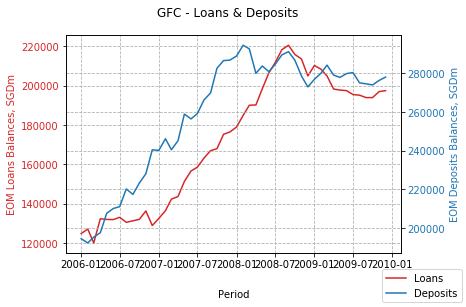

In [129]:
# GFC (2007-2008)

x = eom_GFC['Period']
y = eom_GFC['Loans']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('EOM Loans Balances, SGD''m', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(which='major', axis='both', linestyle='--')
ax1.xaxis.labelpad = 20


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

z = eom_GFC['Deposits']
color = 'tab:blue'
ax2.set_xlabel('Period')
ax2.set_ylabel('EOM Deposits Balances, SGD''m', color=color)
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(which='major', axis='both', linestyle='--')
ax2.xaxis.labelpad = 20

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('GFC - Loans & Deposits', fontsize=12)
fig.legend(labels = ('Loans','Deposits'),loc='lower right')
plt.show()

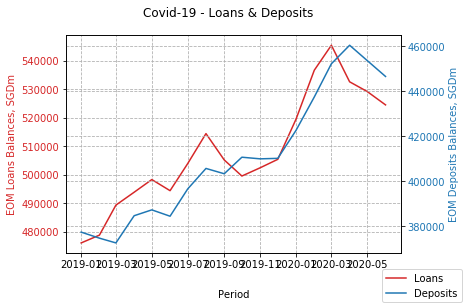

In [132]:
# Covid (2020 ...)
x = eom_Covid['Period']
y = eom_Covid['Loans']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('EOM Loans Balances, SGD''m', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(which='major', axis='both', linestyle='--')
ax1.xaxis.labelpad = 20

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

z = eom_Covid['Deposits']
color = 'tab:blue'
ax2.set_xlabel('Period')
ax2.set_ylabel('EOM Deposits Balances, SGD''m', color=color)
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(which='major', axis='both', linestyle='--')
ax2.xaxis.labelpad = 20

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('Covid-19 - Loans & Deposits', fontsize=12)
fig.legend(labels = ('Loans','Deposits'),loc='lower right')
plt.show()

In [63]:
eom_Covid

,Period,Loans,Deposits
178,2019-01-01,476088.3,377408.9
179,2019-02-01,478815.3,374727.3
180,2019-03-01,489340.8,372614.5
181,2019-04-01,493857.3,384693.9
182,2019-05-01,498293.6,387292.8
183,2019-06-01,494401.3,384473.0
184,2019-07-01,503907.0,396599.7
185,2019-08-01,514406.0,405694.6
186,2019-09-01,505170.6,403331.9
187,2019-10-01,499534.7,410680.7


In [64]:
eom_AFC

,Period,Loans,Deposits


In [65]:
eom_GFC

,Period,Loans,Deposits
22,2006-01-01,124871.5,194449.4
23,2006-02-01,127147.0,192276.1
24,2006-03-01,120105.8,195258.4
25,2006-04-01,132381.4,197553.7
26,2006-05-01,132031.2,207615.0
27,2006-06-01,131956.4,210104.7
28,2006-07-01,133121.2,211051.3
29,2006-08-01,130566.3,220226.2
30,2006-09-01,131335.2,217375.9
31,2006-10-01,132051.1,223231.0
